In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('mnist_784_csv/data/mnist_784_csv.csv')
labels = np.array(df['class'])
df = df.drop('class', axis=1)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(df)
pca = PCA(n_components=2)
pca_init = pca.fit_transform(data)
print(data.shape)
print(pca_init.shape)

(70000, 784)
(70000, 2)


In [15]:
_dict = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 0: []}
for i,row in enumerate(pca_init):
    _dict[labels[i]].append(row)

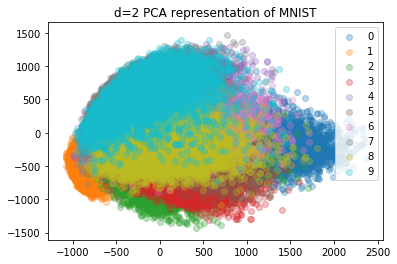

In [17]:
plt.figure()
plt.title('d=2 PCA representation of MNIST')
for i in range(10):
    plt.scatter(np.array(_dict[i])[:,0], np.array(_dict[i])[:,1], alpha=0.3)
plt.legend(range(10))
plt.show()

In [19]:
df_init = pd.DataFrame({'dim_1': pca_init[:,0], 'dim_2': pca_init[:,1], 'label':labels})
df_init.head()

,dim_1,dim_2,label
0,122.252773,-316.243725,5
1,1010.491755,-289.968185,0
2,-58.994891,393.700795,4
3,-796.965417,-607.424517,1
4,-391.318916,729.808069,9


In [ ]:
df_init.to_csv('mnist_2_pca_init.csv')